<a href="https://colab.research.google.com/github/Rishita32/Data_Science_Lab/blob/main/RishitaMote_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Name: Rishita Mote
#### UID: 2018130029
#### Batch B


###Experiment 4: Analyze statistical data using Python/R programming. 
#####Objective:  Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions ( Normal distribution, chi-square distribution), Hypothesis testing, pair-wise association (Pearson correlation test, t-test, ANOVA), Non-parametric test (Spearman rank0 etc)

#1. Load the dataset (Use pandas )

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
data1 = pd.read_csv('drive/MyDrive/Data Science/Lab/auto-mpg.csv', na_values = "?", comment = "\t", skipinitialspace = True) 

df1=pd.DataFrame(data1)


Mounted at /content/drive


In [3]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


#2. Data Preprocessing (Handling NA values)

In [5]:
print(df1.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [6]:
#replacing NA values of hoursepower column with mean value
df1["horsepower"] = df1["horsepower"].fillna(df1["horsepower"].mean())

print(df1.isna().sum())


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [7]:
# drop car name column
df1.drop(['car name'], inplace = True, axis = 1)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [8]:
df1['origin'] = df1['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,america
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,america
396,28.0,4,120.0,79.0,2625,18.6,82,america


In [10]:
#creating dummy variables for origin
df1 = pd.get_dummies(df1, columns=['origin'])
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


#3. Descriptive Statistics

###Sum

In [11]:
df1.sum()

mpg               9.358800e+03
cylinders         2.171000e+03
displacement      7.698350e+04
horsepower        4.157882e+04
weight            1.182229e+06
acceleration      6.196100e+03
model year        3.025200e+04
origin_america    2.490000e+02
origin_asia       7.900000e+01
origin_europe     7.000000e+01
dtype: float64

###Count

In [12]:
df1.count()

mpg               398
cylinders         398
displacement      398
horsepower        398
weight            398
acceleration      398
model year        398
origin_america    398
origin_asia       398
origin_europe     398
dtype: int64

# 4. Central Tendency Statistics

###Mean

In [13]:
df1.mean()

mpg                 23.514573
cylinders            5.454774
displacement       193.425879
horsepower         104.469388
weight            2970.424623
acceleration        15.568090
model year          76.010050
origin_america       0.625628
origin_asia          0.198492
origin_europe        0.175879
dtype: float64

###Median

In [14]:
df1.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          95.0
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

###Mode

In [15]:
df1.mode()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,13.0,4.0,97.0,150.0,1985,14.5,73.0,1.0,0.0,0.0
1,NaN,NaN,NaN,NaN,2130,NaN,NaN,NaN,NaN,NaN


#5. Dispersion Statistics

###Minimum

In [16]:
df1.min()

mpg                  9.0
cylinders            3.0
displacement        68.0
horsepower          46.0
weight            1613.0
acceleration         8.0
model year          70.0
origin_america       0.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

###Maximum

In [17]:
df1.max()

mpg                 46.6
cylinders            8.0
displacement       455.0
horsepower         230.0
weight            5140.0
acceleration        24.8
model year          82.0
origin_america       1.0
origin_asia          1.0
origin_europe        1.0
dtype: float64

###Variance

In [18]:
df1.var()

mpg                   61.089611
cylinders              2.893415
displacement       10872.199152
horsepower          1459.177916
weight            717140.990526
acceleration           7.604848
model year            13.672443
origin_america         0.234808
origin_asia            0.159494
origin_europe          0.145311
dtype: float64

###Standard Deviation

In [19]:
df1.std()

mpg                 7.815984
cylinders           1.701004
displacement      104.269838
horsepower         38.199187
weight            846.841774
acceleration        2.757689
model year          3.697627
origin_america      0.484569
origin_asia         0.399367
origin_europe       0.381197
dtype: float64

###Skewness

In [20]:
df1.skew()

mpg               0.457066
cylinders         0.526922
displacement      0.719645
horsepower        1.095552
weight            0.531063
acceleration      0.278777
model year        0.011535
origin_america   -0.521133
origin_asia       1.517553
origin_europe     1.709131
dtype: float64

###Quantile

In [21]:
df1.quantile()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          95.0
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
Name: 0.5, dtype: float64

#6. Describe

In [22]:
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


#7. Data Visualisation:

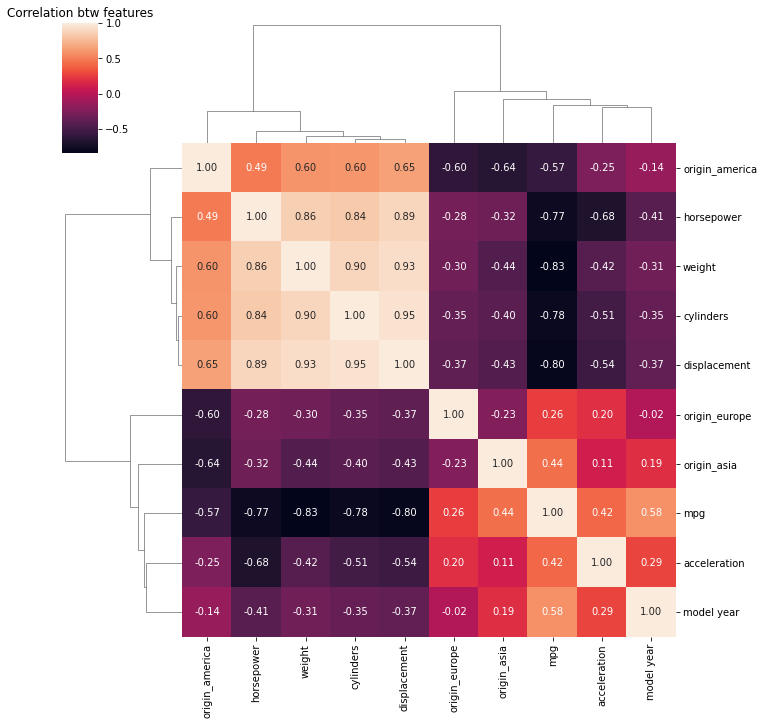

In [23]:
corr_matrix = df1.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

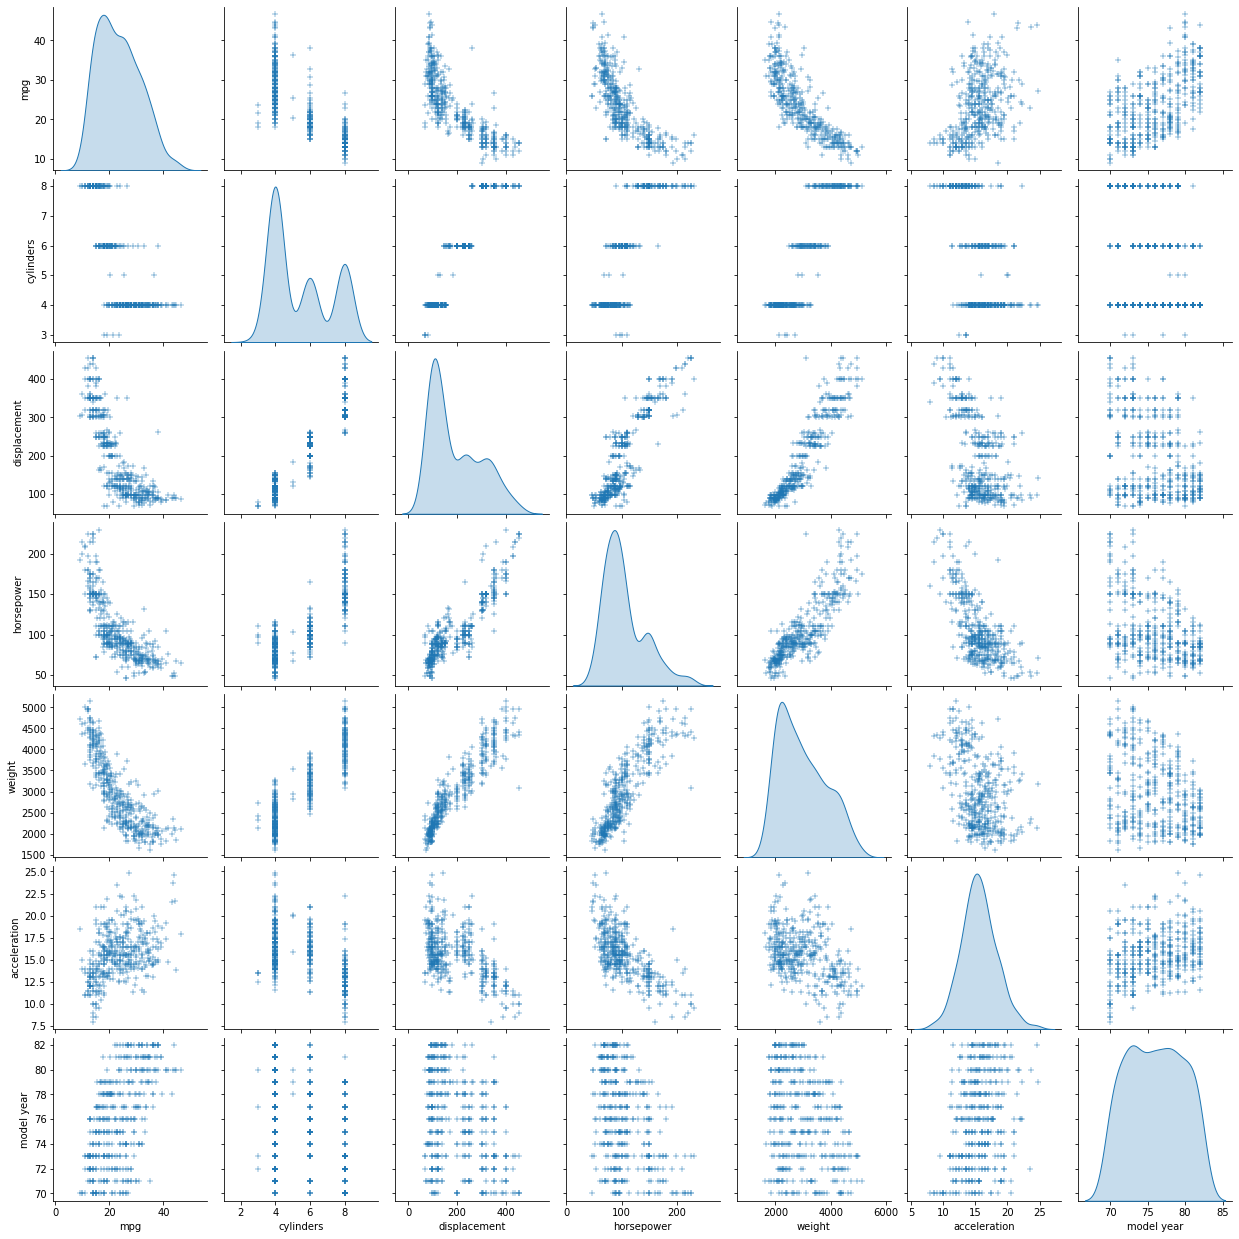

In [25]:
#pair plot
df1_plot = df1.iloc[:, 0:7]
sns.pairplot(df1_plot, diag_kind = "kde", markers = "+")
plt.show()

# Observation: 
# 1. Distribution of cylinder with other variables suggest that cylinder is a categorical feature
# 2. Distribution of origin with other variables suggest that origin is a categorical feature
# 3. Data is highly skewed

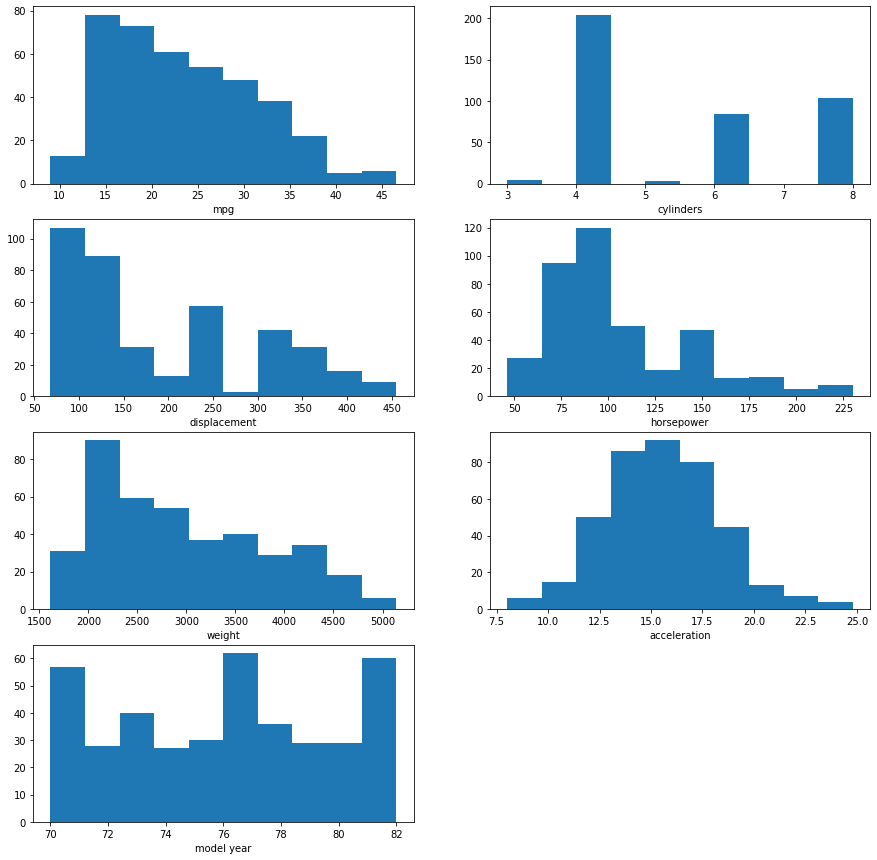

In [26]:
#histogram of all features
df_plot = df1.iloc[:, 0:7]

plt.figure(figsize=(15,15))
col = df_plot.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//2+1,2,i+1)
    plt.hist(df1[col[i]]);
    plt.xlabel(col[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

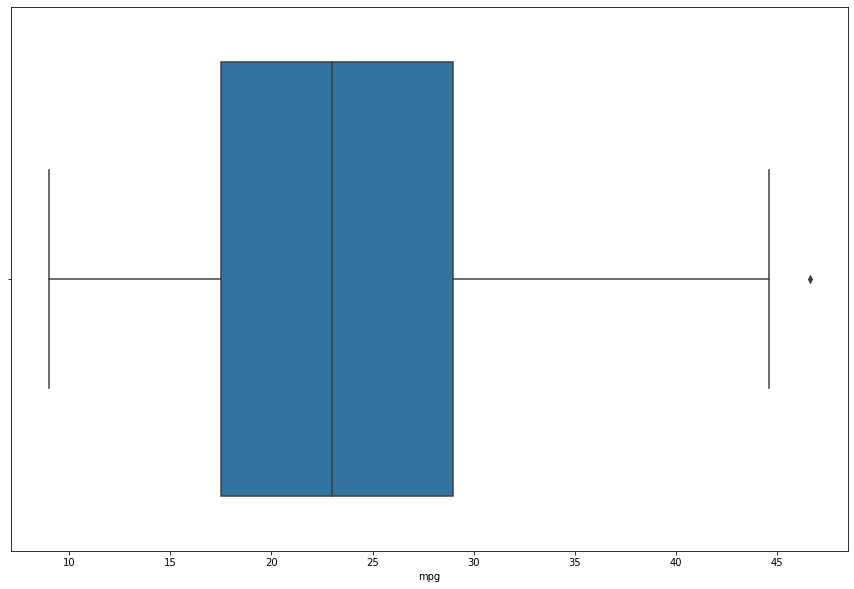

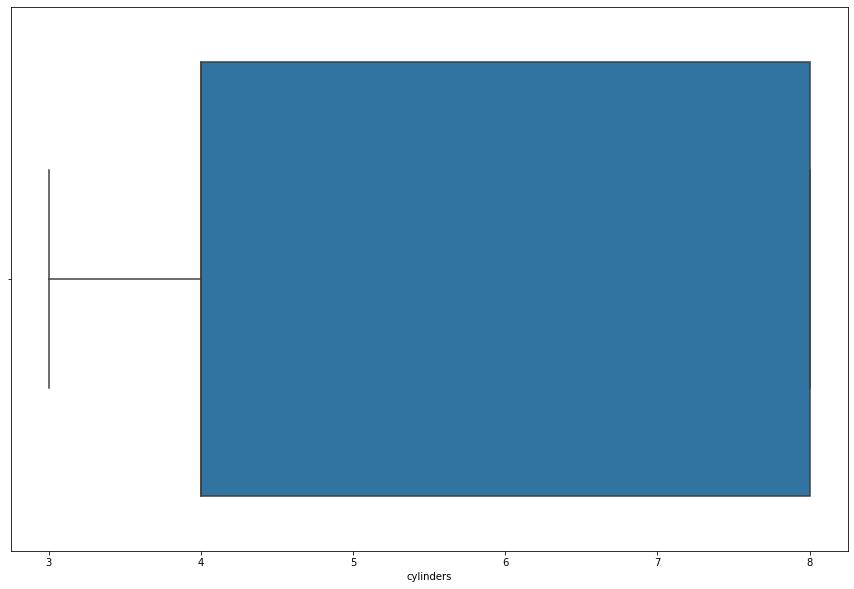

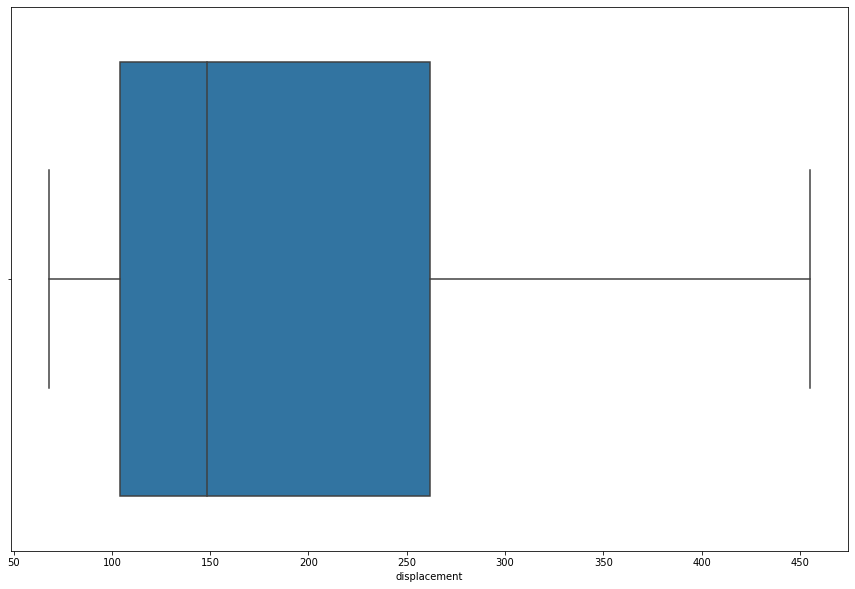

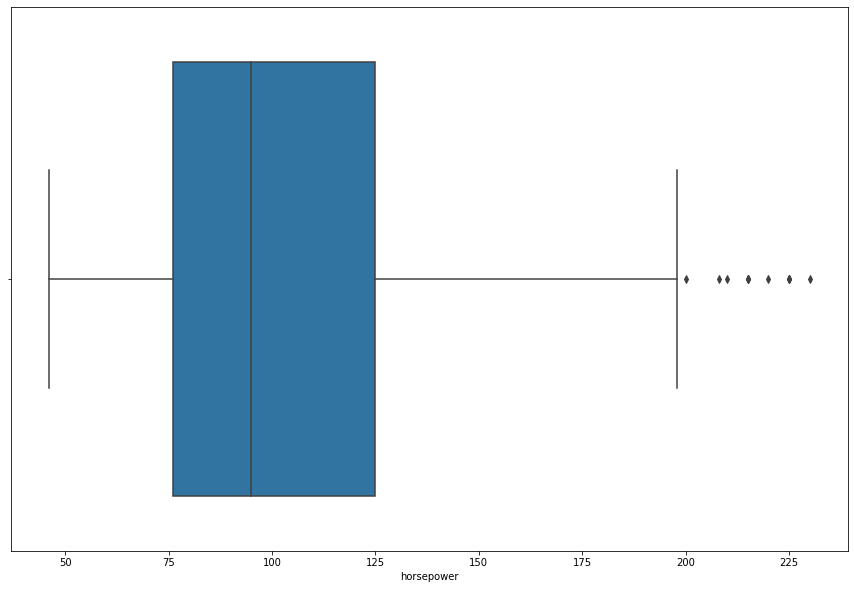

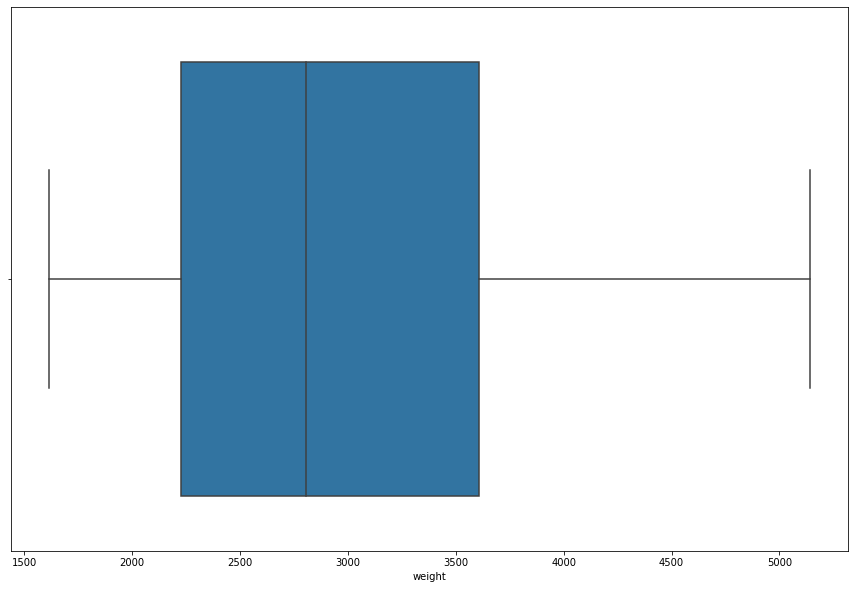

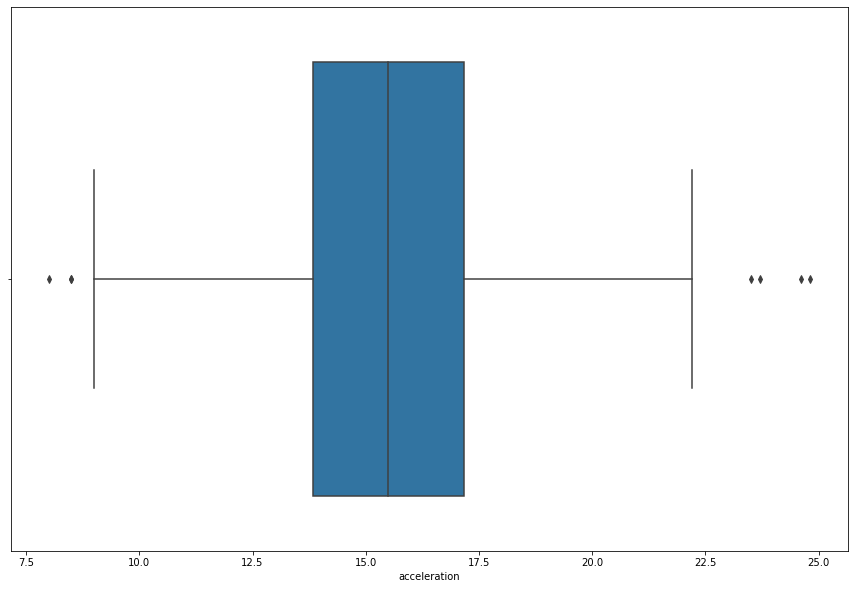

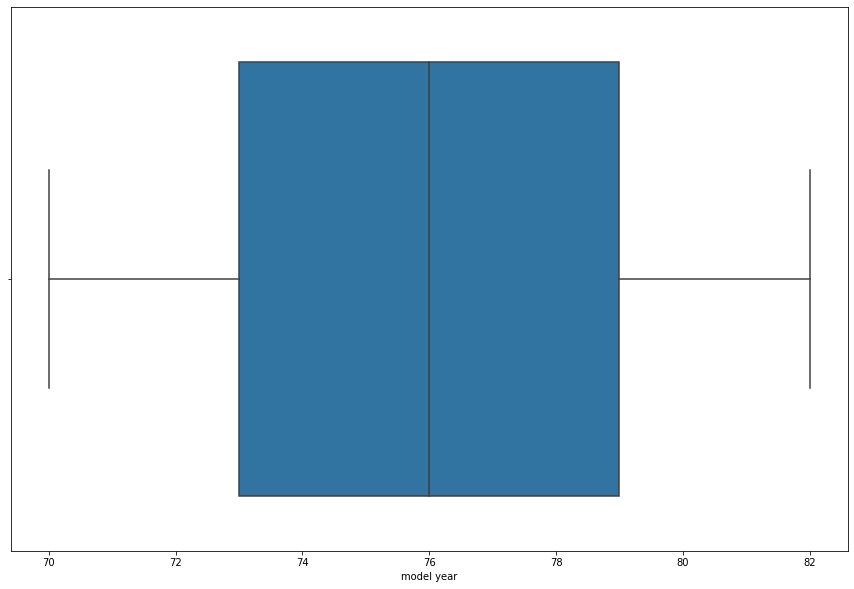

In [27]:
# box plot of all features
for i in df1_plot.columns:
    plt.figure(figsize=(15,10))
    sns.boxplot(x = i, data = df1_plot, orient = "v")

# Observation: 
# 1. horsepower and acceleration feature have outliers